# Taller sobre experimentación

## Preparación del ambiente

### Importe de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as snn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from scipy.stats import zscore

import os

os.environ['OMP_NUM_THREADS'] = '6'

### Conexión con los datos

In [3]:
import scipy.io

mat = scipy.io.loadmat('HSRfeatures.mat')
X = mat['X']
Y = mat['Y']
Y = Y[:,1]
print(Y.shape)
print(X.shape)

(13015,)
(13015, 27)


### Clasificacion en test y train

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape)
print(Ytrain.shape)

(9110, 27)
(9110,)


# Experimentos Realizados

## Svm

### Primera ejecución

In [4]:
mdl = svm.SVC()
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.838     0.790     0.813       937
           1      0.935     0.952     0.943      2968

    accuracy                          0.913      3905
   macro avg      0.886     0.871     0.878      3905
weighted avg      0.912     0.913     0.912      3905



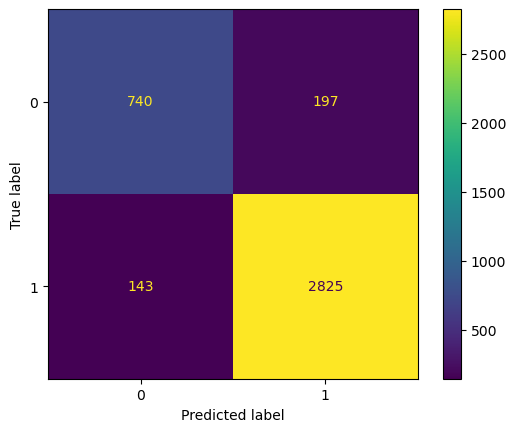

In [5]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

### Optimizado

In [6]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly']}

# Inicializar el modelo SVM
mdl = svm.SVC()

# Realizar búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(mdl, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, Ytrain)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

Mejores parámetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [9]:
mdl = svm.SVC(C=10,kernel='rbf',gamma=0.1)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.884     0.864     0.874       937
           1      0.958     0.964     0.961      2968

    accuracy                          0.940      3905
   macro avg      0.921     0.914     0.918      3905
weighted avg      0.940     0.940     0.940      3905



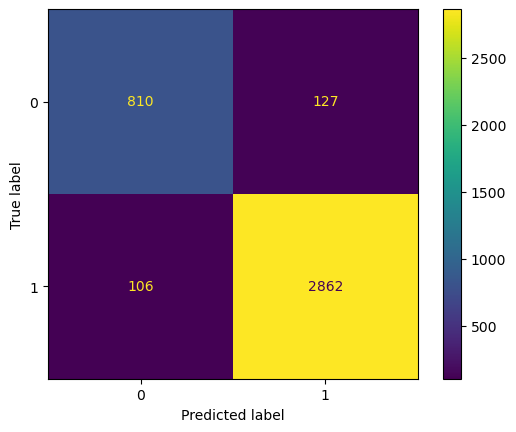

In [10]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

## Red Neural

### Primera Ejecución

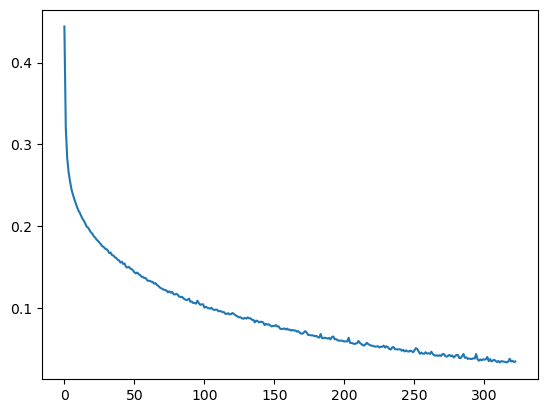

In [11]:
mdl = snn.MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000)
mdl.fit(Xtrain, Ytrain)
plt.plot(mdl.loss_curve_)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.828     0.838     0.833       937
           1      0.949     0.945     0.947      2968

    accuracy                          0.919      3905
   macro avg      0.888     0.891     0.890      3905
weighted avg      0.920     0.919     0.919      3905



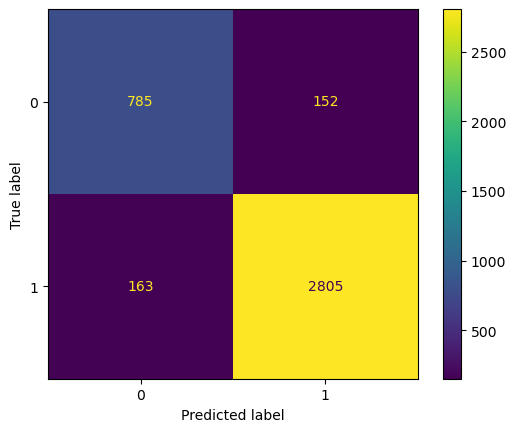

In [12]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

### Optimizado

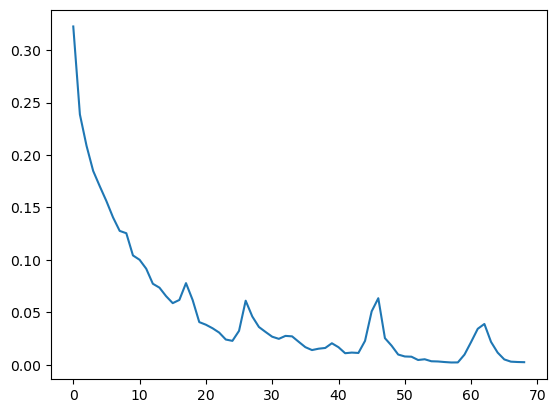

In [18]:
mdl = snn.MLPClassifier(hidden_layer_sizes=(1000,500,250), max_iter=4000)
mdl.fit(Xtrain, Ytrain)
plt.plot(mdl.loss_curve_)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.867     0.880     0.873       937
           1      0.962     0.957     0.960      2968

    accuracy                          0.939      3905
   macro avg      0.914     0.919     0.917      3905
weighted avg      0.939     0.939     0.939      3905



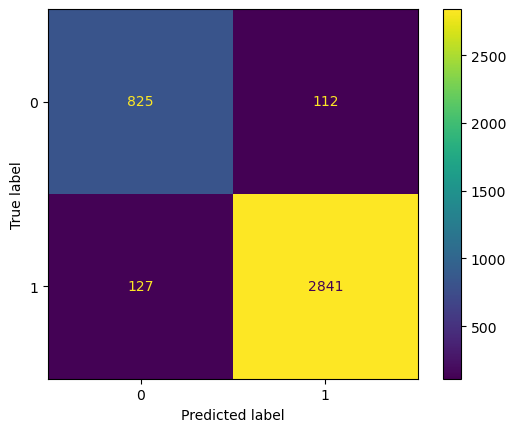

In [19]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

## K-Vecino más cercano Regresivo

In [5]:
mdl = neighbors.KNeighborsClassifier(n_neighbors=1)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.881     0.876     0.879       959
           1      0.960     0.962     0.961      2946

    accuracy                          0.941      3905
   macro avg      0.921     0.919     0.920      3905
weighted avg      0.940     0.941     0.941      3905



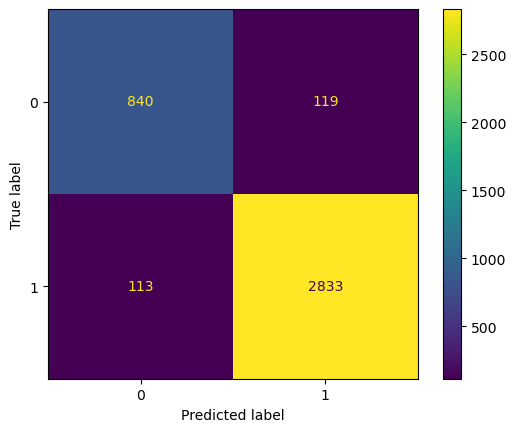

In [6]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

### Optimizado

In [13]:
# Import grid search from sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Define the parameters to test
parameters = {
    'n_neighbors' : range(1, 30),
    'weights': ['uniform', 'distance']
}
# Create grid search instance
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           return_train_score = True)

In [12]:
# Create grid search instance
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           return_train_score = True)

In [14]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [15]:
mdl = neighbors.KNeighborsClassifier(n_neighbors=1)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.881     0.876     0.879       959
           1      0.960     0.962     0.961      2946

    accuracy                          0.941      3905
   macro avg      0.921     0.919     0.920      3905
weighted avg      0.940     0.941     0.941      3905



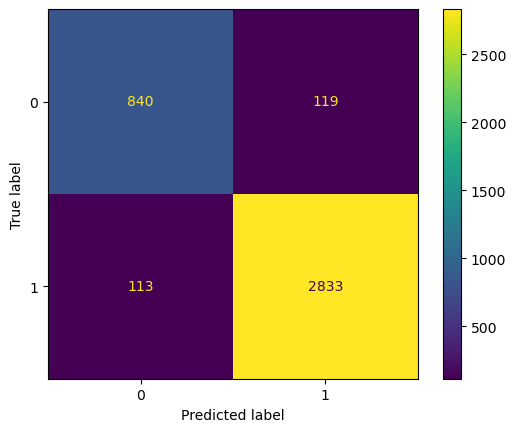

In [16]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();